In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X, Y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=6)

In [3]:
X.shape, Y.shape

((200, 2), (200,))

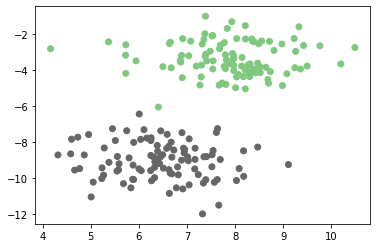

In [4]:
plt.scatter(X[:,0], X[:, 1], c=Y, cmap=plt.cm.Accent)
plt.show()

In [5]:
def sigmoid(z):
    """
    Returns: Sigmoid of z
    """
    return 1 / (1 + np.exp(-z))

In [6]:
def initialize_with_zeros(dim):
    """
    Initializes, weight to (dim, 1) and bias to 0
    Here w: (2, 1), b: 0 (scalar)
    """
    w = np.zeros((dim, 1))
    b = 0.0
    
    return w, b

In [7]:
def forward_propagation(w, b, X, Y):
    """
    w.shape - (2, 1)
    b.shape - 0 (scalar)
    X.shape - (2, 180)
    Y.shape - (1, 180)
    Returns cost after forward propagation
    """
    m = X.shape[1] # No of examples = 180
    z = np.dot(w.T, X) + b # (1, 2) * (2, 180) = (1, 180)
    a = sigmoid(z) # (1, 180)
    
    # Cost function
    cost = (-1 / m) * (np.dot(Y, np.log(a).T) + np.dot(1-Y, np.log(1-a).T)) # (1, 180) * (180, 1) = (1,1)
    cost = np.squeeze(np.array(cost))
    
    return cost

In [8]:
def backward_propagation(w, b, X, Y):
    """
    w.shape - (2, 1)
    b.shape - 0 (scalar)
    X.shape - (2, 180)
    Y.shape - (1, 180)
    Returns the gradients of weights and bias
    dw - gradient of loss function w.r.t w
    db - gradient of loss function w.r.t b
    """
    m = X.shape[1] # 180
    z = np.dot(w.T, X) + b # (1, 2) * (2, 180) = (1, 180)
    a = sigmoid(z) # (1, 180)
    
    
    dz = a - Y # (1, 180) - (1, 180) = (1, 180)
    dw = 1 / m * np.dot(X, dz.T) # (2, 180) * (180, 1) = (2, 1)
    db = 1 / m * np.sum(dz) # (1, 180)
    
    grads = {"dw": dw, "db": db}
    
    return grads

In [9]:
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.01, print_cost=False):
    """
    w.shape - (2, 1)
    b.shape - 0 (scalar)
    X.shape - (2, 180)
    Y.shape - (1, 180)
    Optimizes w and b using gradient descent
    Returns gradient, updated parameters, costs
    """
    costs = [] # cost of after each iteration
    
    for i in range(num_iterations):
        grads = backward_propagation(w, b, X, Y)
        cost = forward_propagation(w, b, X, Y)
        
        dw = grads['dw'] # (2, 1)
        db = grads['db'] # (1, 180)
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # Save cost after each 100 iteration
        if i % 100 == 0:
            costs.append(cost)
            
            if print_cost:
                print("Cost after iteration %i: %f" %(i, cost))
                
    params = {'w': w, 'b': b} # Updated parameters
    grads = {'dw': dw, 'db': db} # Gradients
    
    return params, grads, costs

In [10]:
def predict(w, b, X):
    """
    w.shape - (2, 1)
    b.shape - 0 (scalar)
    X.shape - (2, 180)
    Returns prediction 0/1 for all the examples in X
    """
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m)) # ((1, 180))
    w = w.reshape(X.shape[0], 1) # (2, 1)
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        if A[0, i] > 0.5:
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0
    
    return Y_prediction

In [11]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Returns a dictionary of all model parameters
    """
    
    w, b = initialize_with_zeros(X_train.shape[0])
    
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = params['w']
    b = params['b']
    
    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)
    
    if print_cost:
        print("Train accuracy: {}%".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("Test accuracy: {}%".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    d = {"costs": costs,
         "Y_prediction_train": Y_prediction_train,
         "Y_prediction_test": Y_prediction_test,
         "w": w,
         "b": b,
         "learning_rate": learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [12]:
X_train = X[ : 180, :].T
X_test = X[180 : , :].T
Y_train = Y[ : 180].reshape((-1, 1)).T
Y_test = Y[180 :].reshape((-1, 1)).T
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(2, 180) (1, 180) (2, 20) (1, 20)


In [13]:
logistic_model = model(X_train, Y_train, X_test, Y_test, num_iterations=1000, learning_rate=0.001, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.547483
Cost after iteration 200: 0.451142
Cost after iteration 300: 0.382347
Cost after iteration 400: 0.331575
Cost after iteration 500: 0.292921
Cost after iteration 600: 0.262668
Cost after iteration 700: 0.238419
Cost after iteration 800: 0.218582
Cost after iteration 900: 0.202070
Train accuracy: 99.44444444444444%
Test accuracy: 100.0%


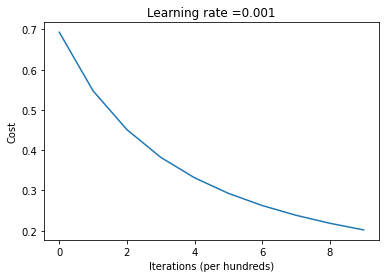

In [14]:
costs = logistic_model['costs']
plt.plot(costs)
plt.ylabel('Cost')
plt.xlabel('Iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_model["learning_rate"]))
plt.show()